# Exercises Chapter 5

## Question 5

In [72]:
# load modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

np.random.seed(1)

In [15]:
# import data
default = pd.read_csv('./datasets/Default.csv',index_col=0)
default['default_yes'] = (default['default'] == 'Yes').astype('int')
default.head()

,default,student,balance,income,default_yes
1,No,No,729.526495,44361.62507,0
2,No,Yes,817.180407,12106.13470,0
3,No,No,1073.549164,31767.13895,0
4,No,No,529.250605,35704.49394,0
5,No,No,785.655883,38463.49588,0


In [16]:
X = default[['income','balance']]
y = default['default_yes']

In [17]:
# logistic regression
f = 'default_yes ~ income + balance'
res = smf.logit(formula=f, data=default).fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   10.0000  
Dependent Variable: default_yes      Pseudo R-squared: 0.459    
Date:               2018-07-24 17:01 AIC:              1584.9663
No. Observations:   10000            BIC:              1606.5973
Df Model:           2                Log-Likelihood:   -789.48  
Df Residuals:       9997             LL-Null:          -1460.3  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------
Intercept    -11.5405   0.4348 -26.5437 0.0000 -12.3926 -10.6883
income         0.0000   0.0000   4.1741 0.0000   0.0000   0.0000
balance        0.0056   0.0002  24.8354 0.0000   0.0052   0.0061
================================================================

"""

In [18]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [19]:
# logistic regression on training set
lr = LogisticRegression(C=10**6, tol=1e-6)
mod = lr.fit(X_train, y_train)
mod.coef_

array([[1.62553551e-05, 5.83500517e-03]])

In [20]:
# compute prediction
y_pred = mod.predict(X_test)

In [21]:
# Validation set error
1-np.mean(y_pred==y_test)

0.025000000000000022

In [22]:
# iterative process and compare the validation set error
error=[]
for i in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    mod = lr.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    error.append(1-np.mean(y_pred==y_test))
np.mean(error)

0.026631333333333337

In [23]:
# we now include the student feature as a dummy variable
default['is_student'] = (default['student'] == 'Yes').astype('int')
default.head()

,default,student,balance,income,default_yes,is_student
1,No,No,729.526495,44361.62507,0,0
2,No,Yes,817.180407,12106.13470,0,1
3,No,No,1073.549164,31767.13895,0,0
4,No,No,529.250605,35704.49394,0,0
5,No,No,785.655883,38463.49588,0,0


In [24]:
# parameters for the logistic regression
X = default[['income','balance','is_student']]
y = default['default_yes']

In [25]:
# logistic regression
f = 'default_yes ~ income + balance + is_student'
res = smf.logit(formula=f, data=default).fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   10.0000  
Dependent Variable: default_yes      Pseudo R-squared: 0.462    
Date:               2018-07-24 17:01 AIC:              1579.5448
No. Observations:   10000            BIC:              1608.3862
Df Model:           3                Log-Likelihood:   -785.77  
Df Residuals:       9996             LL-Null:          -1460.3  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept     -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
income          0.0000   0.0000   0.3698 0.7115  -0.0000  0.0000
balance         0.0057   0.0002  24.7365 0.0000   0.0053  0.0062
is_student     -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
================================================================

"""

In [26]:
# iterative process and compare the validation set error
error=[]
for i in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    mod = lr.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    error.append(1-np.mean(y_pred==y_test))
np.mean(error)

0.02673333333333333

The average error increased from 2.6695% to 2.7061%.

## Question 6

In [29]:
f = 'default_yes ~ income + balance'
res = smf.logit(formula=f, data=default).fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   10.0000  
Dependent Variable: default_yes      Pseudo R-squared: 0.459    
Date:               2018-07-24 17:03 AIC:              1584.9663
No. Observations:   10000            BIC:              1606.5973
Df Model:           2                Log-Likelihood:   -789.48  
Df Residuals:       9997             LL-Null:          -1460.3  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------
Intercept    -11.5405   0.4348 -26.5437 0.0000 -12.3926 -10.6883
income         0.0000   0.0000   4.1741 0.0000   0.0000   0.0000
balance        0.0056   0.0002  24.8354 0.0000   0.0052   0.0061
================================================================

"""

In [44]:
def boot_fn(default):
    mod1 = smf.glm(formula='default ~ income + balance', data=default, family=sm.families.Binomial()).fit()
    coef_income = mod1.params[1]
    coef_balance = mod1.params[2]
    return [coef_income, coef_balance]

boot_fn(default)

[-2.0808975528884918e-05, -0.005647102950093516]

In [52]:
def draw_boot(df, agg, n_boot=100, n_size=100):
    """
    Draw n_boot bootstrap from the dataset df. The size of the bootstrat is defined by n_size and the agg function is
    used to aggregate the bootstrap into a single statistic.
    """
    boot_samples = []
    for boot in range(n_boot):
        # select data with replacement
        indices = np.random.choice(df.index, n_size, replace=True)
        boot_samples.append(agg(df, indices))
    
    # compute the standard error of the estimate
    se_estimate = scipy.std(boot_samples,axis=0)
    print('\nBootstrapped Std. Error(s) =', se_estimate)

In [53]:
pd.DataFrame(draw_boot(default,boof_fn)).mean()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10

Bootstrapped Std. Error(s) = [2.84217094e-14 2.71050543e-20 8.67361738e-19]


Series([], dtype: float64)

## Question 8

In [92]:
np.random.seed(1)
x = np.random.normal(size=100)
y = np.random.normal(size=100)

y = x - 2*x**2 + np.random.normal(size=100)

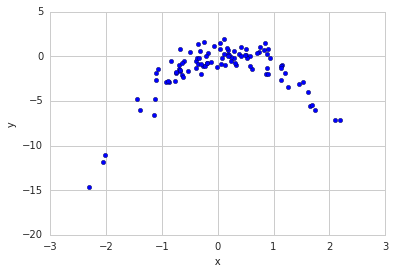

In [93]:
# scatterplot
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y");

In [94]:
loocv = LeaveOneOut()
df = pd.DataFrame({"x":x, "y":y})

In [100]:
min_deg = 1  # Minimum degree of the polynomial equations considered
max_deg = 4+1  # Maximum degree of the polynomial equations considered
scores = []
# Compute mean squared error (MSE) for the different polynomial equations.
for i in range(min_deg, max_deg):
    # Leave-one-out cross validation 
    for train, test in loocv.split(df):
        X_train = df['x'][train]
        y_train = df['y'][train]
        X_test = df['x'][test]
        y_test = df['y'][test]

        # Pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
                      ('linear', LinearRegression())])
        model.fit(X_train[:,np.newaxis], y_train)

        # MSE
        score = mean_squared_error(y_test, model.predict(X_test[:,np.newaxis]))
        scores.append(score)
    print('Model %i (MSE): %f' % (i,np.mean(scores)))
    scores = []

Model 1 (MSE): 7.974329
Model 2 (MSE): 0.982402
Model 3 (MSE): 0.981757
Model 4 (MSE): 1.016171


In [102]:
# statistical significance
for deg in range(min_deg,max_deg):
    pol = PolynomialFeatures(degree = deg)
    X_pol = pol.fit_transform(df['x'][:,np.newaxis])
    y = df['y']

    model = sm.OLS(y, X_pol)
    results = model.fit()

    print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.606
Date:                Tue, 24 Jul 2018   Prob (F-statistic):             0.0199
Time:                        17:48:19   Log-Likelihood:                -240.53
No. Observations:                 100   AIC:                             485.1
Df Residuals:                      98   BIC:                             490.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5478      0.272     -5.701      0.0

## Question 9

In [103]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [109]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = pd.Series(boston.target)
medv = df['MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [110]:
mu_hat = medv.mean()
print('mu_hat = ' + str(mu_hat))

mu_hat = 22.532806324110698


In [113]:
SE = medv.std() / np.sqrt(len(medv))
print('standard error =', SE)

standard error = 0.4088611474975351


In [118]:
boot_mean = np.std([np.mean(medv.sample(replace=True,n=len(medv))) for _ in range(1000)])
print('bootstrap mean =', boot_mean)

bootstrap mean = 0.423622810159026


In [119]:
print(mu_hat - 2*boot_mean, mu_hat + 2*boot_mean)

21.685560703792646 23.38005194442875
